Red wine classification

In [30]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('winequalityN.csv')

# Drop Rows with NaN Values inplace
df.dropna(inplace=True)

df.sample

<bound method NDFrame.sample of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total

<AxesSubplot: >

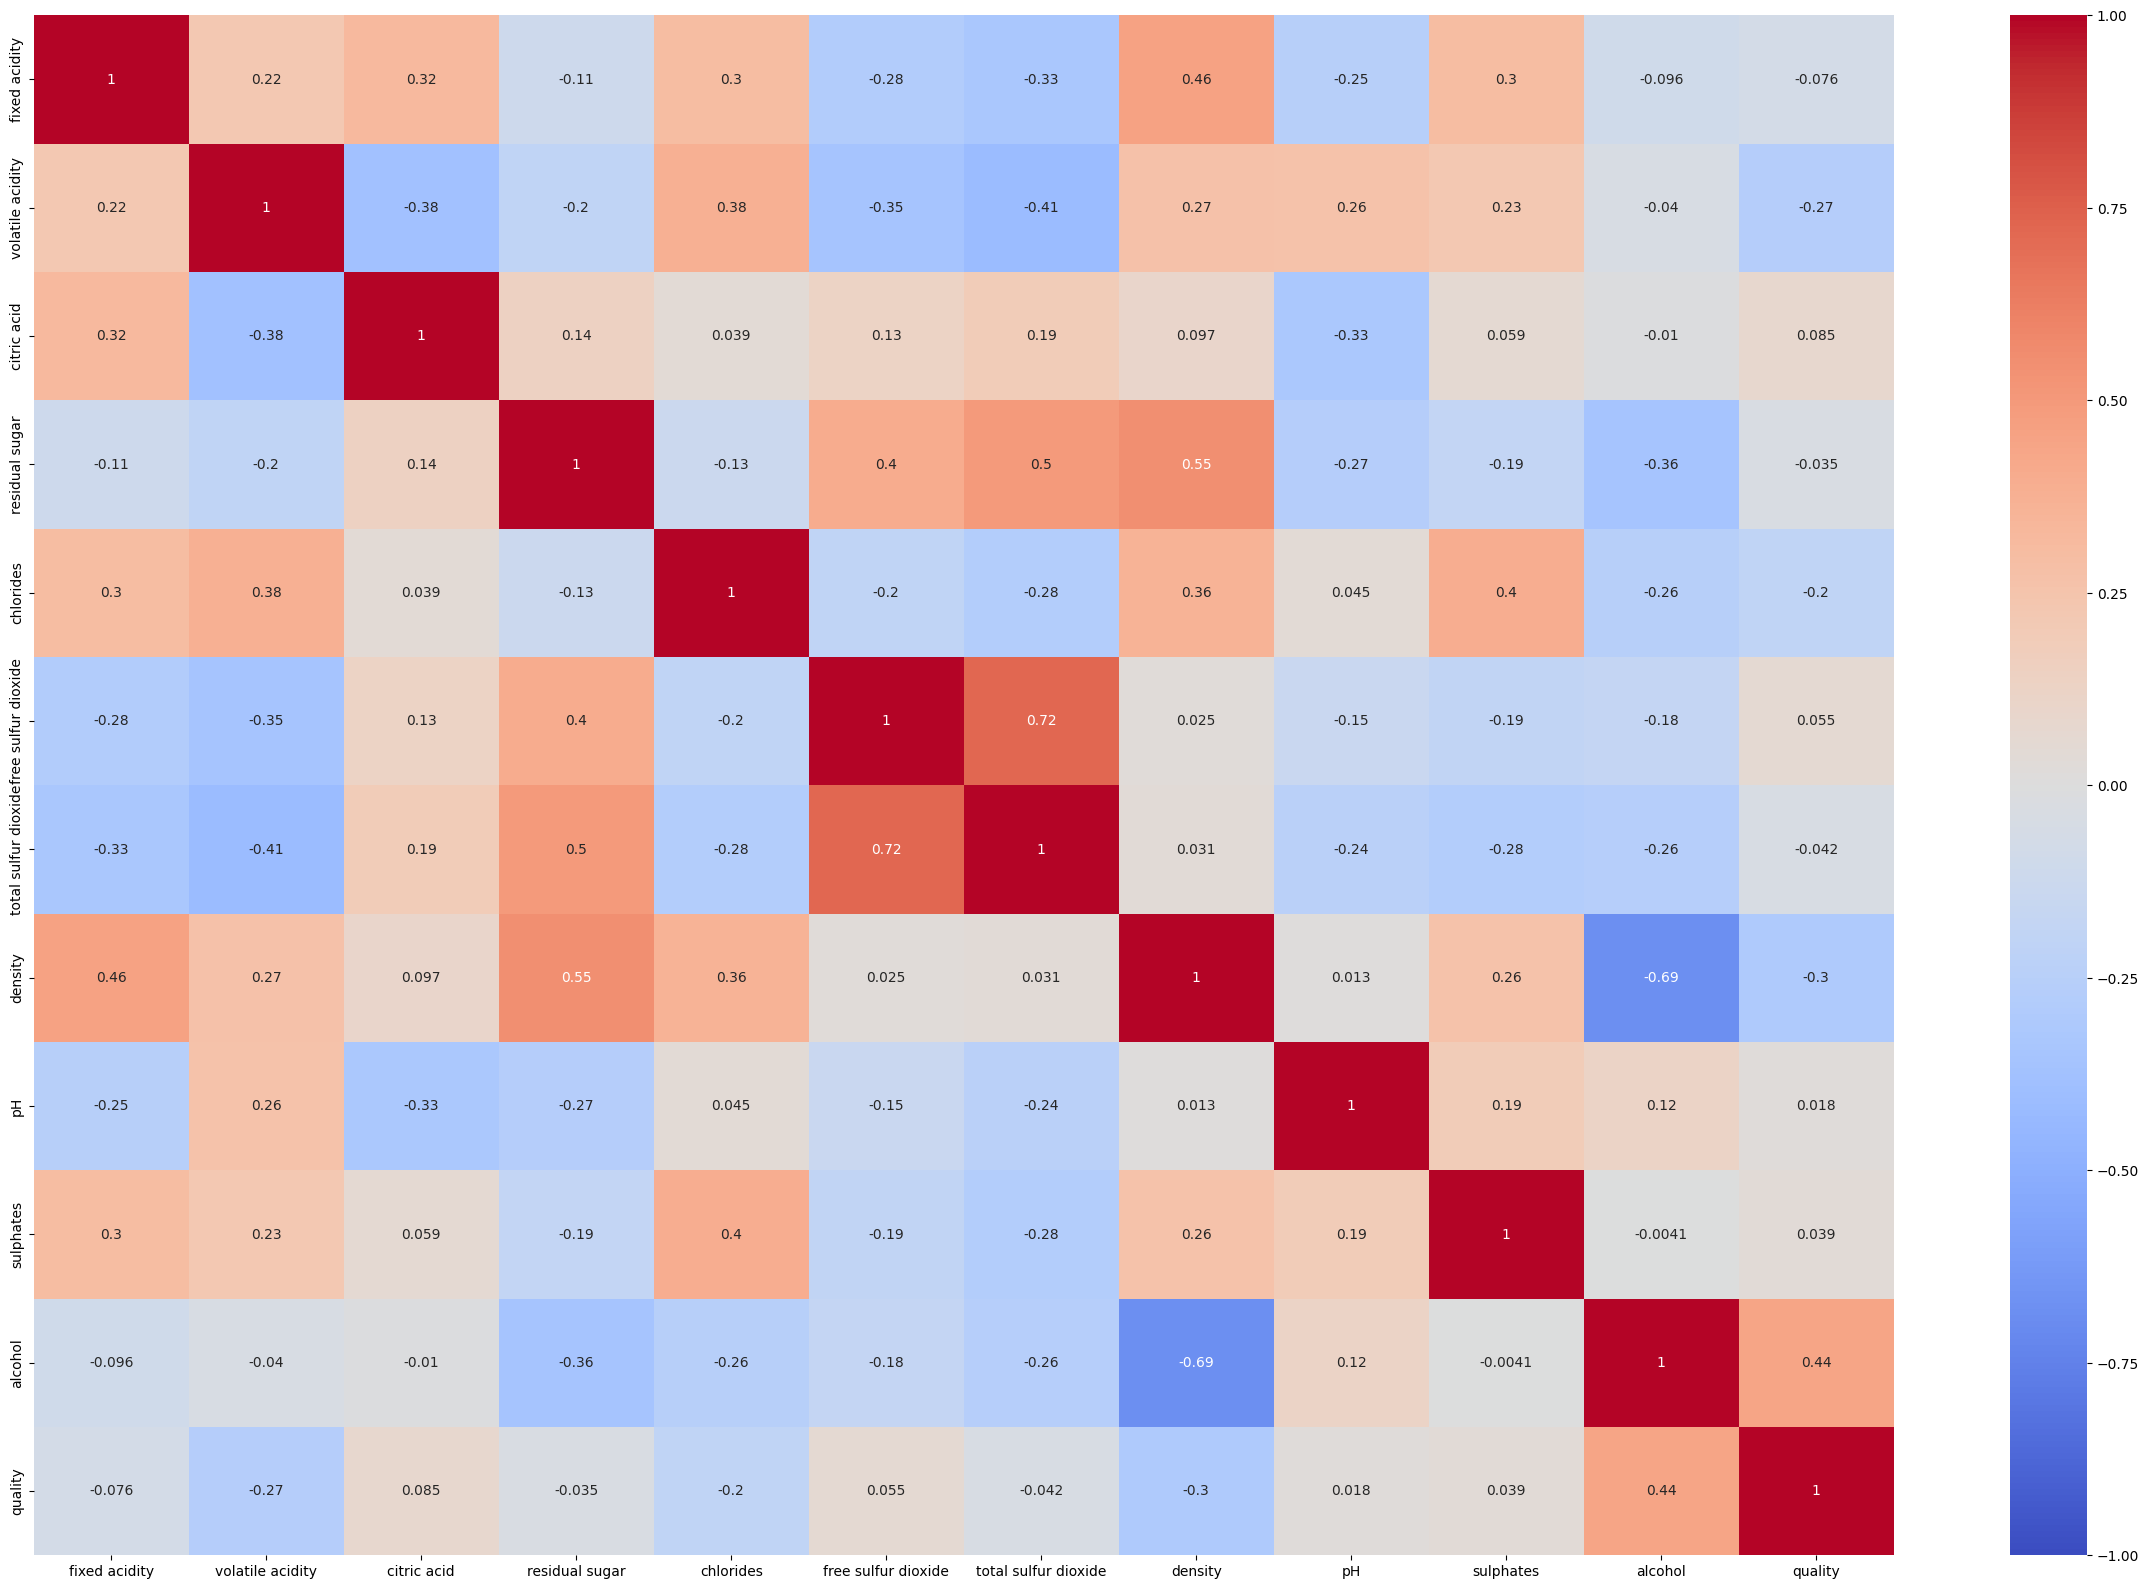

In [31]:
df.describe() #return a description of the dataframe 

plt.figure(figsize=(30,20)) #create figure
sb.heatmap(df.corr(),vmin=-1,vmax=1,cmap="coolwarm",annot=True) #show the data as a heatmap

<AxesSubplot: xlabel='alcohol', ylabel='quality'>

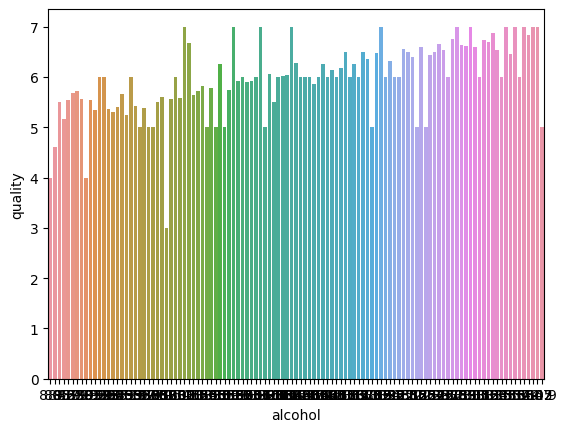

In [22]:
# Calculate the mean scores for each alcohol group
mean_scores = df.groupby("alcohol").mean()

# Create a bar plot of the mean scores for each race/ethnicity group
sb.barplot(data=mean_scores, x=mean_scores.index, y="quality")

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#make new dataframe of the important variables
important_data = df[['alcohol','volatile acidity','sulphates','citric acid','total sulfur dioxide','density','chlorides','fixed acidity']].values
labels = df['quality'].values


#Split the dataset into chunks
X_train, X_test, y_train, y_test = train_test_split(important_data, labels, test_size=0.5)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Define classifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

print(cm)
print("Accuracy", ac)

[[  0   1   4   1   0   0   0]
 [  0   3  19  14   0   1   0]
 [  0   1 282 109   8   1   0]
 [  0   1 139 392  58   3   0]
 [  0   1  21 111  78   2   0]
 [  0   0   2  18  19   2   0]
 [  0   0   0   1   1   0   0]]
Accuracy 0.5854601701469451


Implementing K-Fold:

In [45]:
#Split the dataset into chunks train/test
X_train, X_test, y_train, y_test = train_test_split(important_data, labels, test_size=0.25)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4847, 8)
(4847,)
(1616, 8)
(1616,)


In [ ]:
K = 4
num_val_samples = len(X_train) // K
num_epochs = 100
all_scores = []
#Define classifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)

for i in range(K):
    print('processing fold', i)
    
    # Prepare the validation data: data from partition i
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data = X_train[a : b]
    val_targets = y_train[a : b]
    
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate([X_train[:a], X_train[b:]], axis=0)
    partial_train_targets = np.concatenate([y_train[:a], y_train[b:]], axis=0)
    
    
    # Fit the classifier to the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = classifier.predict(X_test)